# Customer Satisfaction Prediction Project
This notebook includes EDA, feature engineering, model building, and evaluation steps for predicting customer satisfaction.

In [45]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
# Load data
df = pd.read_csv("/content/customer_support_tickets.csv")
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [47]:

# Convert date columns to datetime
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

# Drop irrelevant columns
df.drop(['Ticket ID', 'Customer Name', 'Customer Email', 'Ticket Description', 'Resolution'], axis=1, inplace=True)

# Drop rows where target is missing
df.dropna(subset=['Customer Satisfaction Rating'], inplace=True)

# Fill remaining missing values
df.fillna(method='ffill', inplace=True)


/tmp/ipython-input-47-4233635443.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [48]:

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le



In [49]:
# Split features and target
X = df.drop("Customer Satisfaction Rating", axis=1)
y = df["Customer Satisfaction Rating"]


In [50]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert datetime columns to numerical representation (seconds since epoch)
for col in ['Date of Purchase', 'First Response Time', 'Time to Resolution']:
    X_train[col] = X_train[col].astype(np.int64) // 10**9
    X_test[col] = X_test[col].astype(np.int64) // 10**9

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [51]:

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.20938628158844766
Classification Report:
               precision    recall  f1-score   support

         1.0       0.18      0.21      0.19       109
         2.0       0.24      0.21      0.23       117
         3.0       0.22      0.29      0.25       112
         4.0       0.22      0.18      0.20       108
         5.0       0.18      0.15      0.16       108

    accuracy                           0.21       554
   macro avg       0.21      0.21      0.21       554
weighted avg       0.21      0.21      0.21       554

Confusion Matrix:
 [[23 25 25 18 18]
 [25 25 31 20 16]
 [29 18 33 14 18]
 [23 14 30 19 22]
 [27 21 29 15 16]]


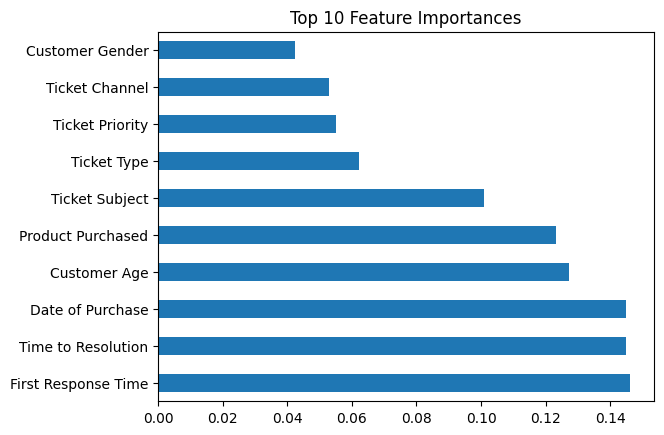

In [52]:
# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

/tmp/ipython-input-53-191078004.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=df, palette='muted')


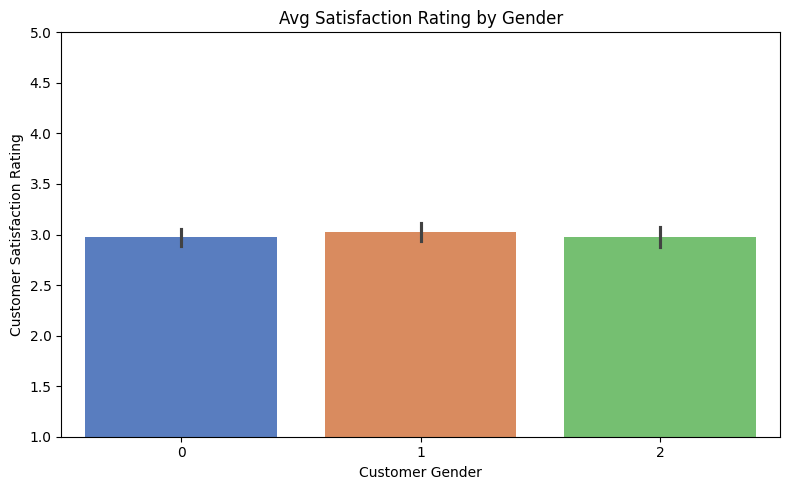

In [53]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=df, palette='muted')
plt.title('Avg Satisfaction Rating by Gender')
plt.ylim(1, 5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-54-2954241164.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age Group', palette='coolwarm', order=labels)


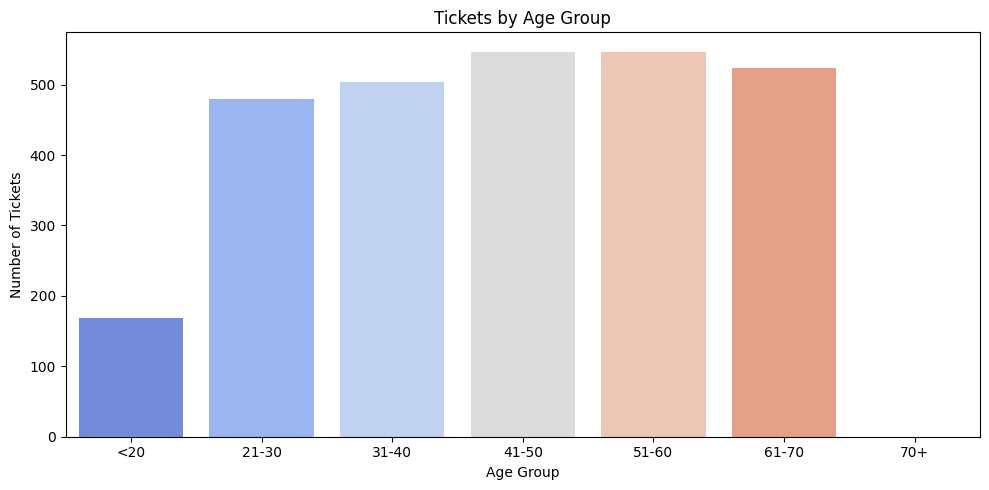

In [54]:
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['<20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels)

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Age Group', palette='coolwarm', order=labels)
plt.title('Tickets by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets')
plt.tight_layout()
plt.show()


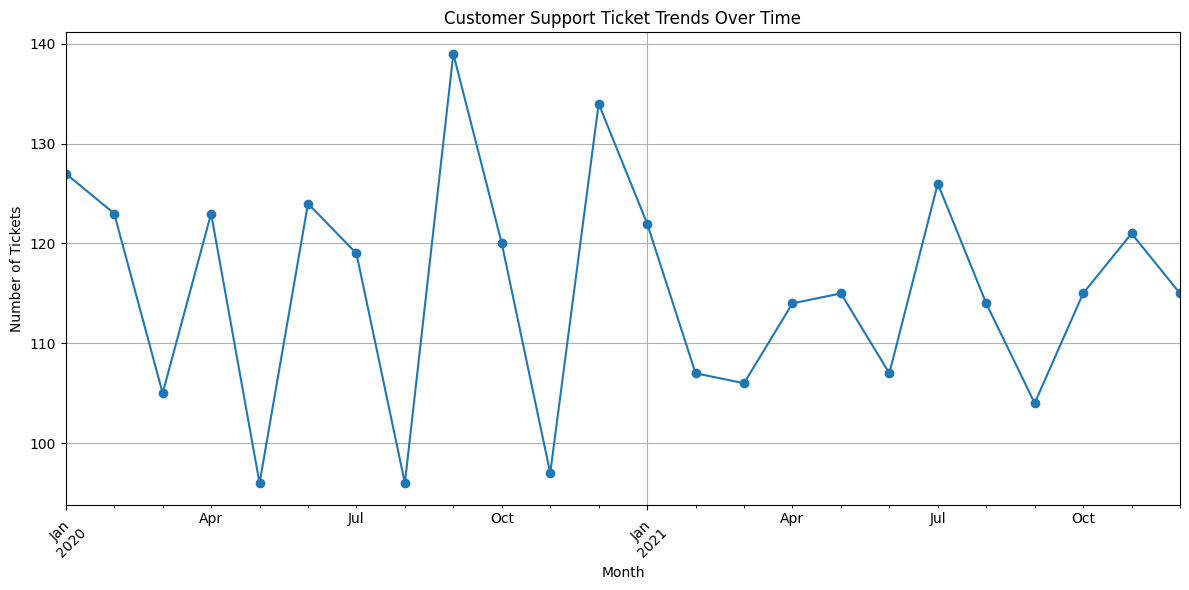

In [55]:
df['YearMonth'] = df['Date of Purchase'].dt.to_period('M')
monthly_trends = df.groupby('YearMonth').size()

plt.figure(figsize=(12, 6))
monthly_trends.plot(marker='o', linestyle='-')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()